<div >
    <img src = "../banner/banner_ML_UNLP_1900_200.png" />
</div>

<a target="_blank" href="https://colab.research.google.com/github/ignaciomsarmiento/ML_UNLP_Lectures/blob/main/Week05/Notebook_SS05_NN.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



# Problemas de Regresión con Redes Neuronales usando Keras 

# Predicting Wages

Our objective today is to construct a model of individual wages

$$
w = f(X) + u 
$$

where w is the  wage, and X is a matrix that includes potential explanatory variables/predictors. In this problem set, we will focus on a linear model of the form

\begin{align}
 ln(w) & = \beta_0 + \beta_1 X_1 + \dots + \beta_p X_p  + u 
\end{align}

were $ln(w)$ is the logarithm of the wage.

To illustrate I'm going to use a sample of the NLSY97. The NLSY97 is  a nationally representative sample of 8,984 men and women born during the years 1980 through 1984 and living in the United States at the time of the initial survey in 1997.  Participants were ages 12 to 16 as of December 31, 1996.  Interviews were conducted annually from 1997 to 2011 and biennially since then.  

Let's load the modules and the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

nlsy=pd.read_csv('https://raw.githubusercontent.com/ignaciomsarmiento/datasets/main/nlsy97.csv')
nlsy.head()

,lnw_2016,educ,black,hispanic,other,exp,afqt,mom_educ,dad_educ,yhea_100_1997,...,_XPexp_13,_XPexp_14,_XPexp_16,_XPexp_17,_XPexp_18,_XPexp_19,_XPexp_20,_XPexp_21,_XPexp_22,_XPexp_23
0,4.076898,16,0,0,0,11,7.0724,12,12,3,...,0,0,0,0,0,0,0,0,0,0
1,3.294138,9,0,0,0,19,4.7481,9,10,2,...,0,0,0,0,0,1,0,0,0,0
2,2.830896,9,0,1,0,22,1.1987,12,9,3,...,0,0,0,0,0,0,0,0,1,0
3,4.306459,16,0,0,0,13,8.9321,16,18,2,...,1,0,0,0,0,0,0,0,0,0
4,5.991465,16,0,1,0,15,2.2618,16,16,1,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X_train.shape

(886, 5)

In [2]:
X = nlsy[[ "educ", "exp", "afqt", "mom_educ", "dad_educ"]]

y=nlsy[["lnw_2016"]]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        test_size=0.3,
                                        train_size=0.7,
                                        random_state = 123
                                    )

In [15]:
886/64

13.84375

## Keras

En este tutorial  utilizaremos las librerias keras [`keras`](https://keras.io/) y [`Tensorflow `](https://www.tensorflow.org/?hl=es-419) dos paquetes fundamentales en el area de deep learning.


Keras es una biblioteca de aprendizaje profundo de código abierto escrita en Python. Keras proporciona una interfaz de alto nivel para construir y entrenar modelos de aprendizaje profundo en una variedad de plataformas.La biblioteca Keras es conocida por ser fácil de usar, modular y extensible. Permite a los usuarios crear modelos de aprendizaje profundo con pocas líneas de código y está diseñada para ser utilizada en combinación con otras bibliotecas populares de Python, como TensorFlow.

Keras ofrece una amplia gama de  bloques constructivos para construir modelos de Redes Neuronales. También incluye una amplia gama de funciones de pérdida, optimizadores y métricas de evaluación que se pueden utilizar para entrenar y evaluar modelos.


In [4]:
from keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense

## Armando la primer red

### Configurar las capas 

La arquitectura de una red neuronal se construye a partir de capas. Las capas son bloques fundamentales que procesan la entrada y producen la salida. Cada capa se configura con un conjunto de parámetros que definen cómo se transforma la entrada en la salida y los flujos a través de ellas.

Inicializamos el modelo sequencial

In [5]:
model = Sequential()

2023-12-01 17:05:48.509997: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Una red neuronal típicamente se compone de tres tipos de capas: capas de entrada, capas ocultas y capas de salida. Cada capa se compone de un conjunto de neuronas que procesan la información de entrada y producen una salida.

* Capas de entrada: son la primera capa de la red y se encargan de recibir los datos de entrada y procesarlos para pasarlos a la siguiente capa. 
* Capas ocultas: son capas intermedias entre la capa de entrada y la capa de salida. En estas capas, la información de entrada se procesa y se extraen características relevantes de los datos. Estas capas son importantes porque determinan la capacidad de la red para aprender patrones complejos y representaciones abstractas.




Existen varios tipos de capas ocultas, veremos a continuación algunas de estas para entrenar el modelo. Al configurar las capas, se debe especificar la cantidad y tipo de capas que se utilizarán, así como los parámetros específicos de cada capa. 

In [6]:
model.add(Dense(units=4, input_dim = 5, activation = 'relu'))

* Capas de salida: son la última capa de la red y se encargan de producir la salida final. En una red neuronal de clasificación, como la que estamos construyendo, la capa de salida tendría un conjunto de neuronas que representan las diferentes clases posibles y producirían una salida para indicar a qué clase pertenece el dato de entrada.

In [7]:
model.add(Dense(units=1, activation = 'linear'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 24        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________


### Dense

En una capa `Dense`, cada neurona está conectada a todas las neuronas de la capa anterior. Los `units`que se especifican en los parámetros, se refieren a la cantidad de neuronas que se deben incluir en una capa determinada de la red neuronal. Es decir, los units son el número de nodos de la capa. Por último, el parámetro `activation`  especifica la función de activación que se va a usar en esa capa de la red.



### Compilar el modelo

Antes de que el modelo esté listo para el entrenamiento, necesita algunos ajustes más. Éstos se añaden durante el paso de compilación del modelo:

* Función de pérdida: mide la precisión del modelo durante el entrenamiento. Queremos minimizar esta función para "dirigir" el modelo en la dirección correcta.

* Optimizador: Así es como se actualiza el modelo basándose en los datos que ve y en su función de pérdida.

* Métricas: se utiliza para evaluar el rendimiento en cada paso del proceso de entrenamiento. Esto permite monitorizar cómo se está desempeñando el modelo a lo largo del tiempo y ajustar la arquitectura de la red si es necesario.

Usaremos respectivamente los siguientes parámetros: 

* La función `mean_squared_error` 

* `Adam`  un algoritmo de optimización de gradiente descendente estocástico popular utilizado en el aprendizaje automático y la optimización de redes neuronales. Para saber más de este pueden ir [acá](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/).

* Usamos `mean_absolute_error` como métrica de desempeño. 



In [9]:

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mean_absolute_error'])


### Entrenar el modelo 

El entrenamiento del modelo de red neuronal requiere los siguientes pasos:

* Alimentar el modelo con los datos de entrenamiento: en este ejemplo, las matrices x_train y y_train
* El modelo aprende a asociar salarios y caraacteristicas.
* Pedimos al modelo que haga predicciones sobre un conjunto de prueba (en este ejemplo, la matriz x_test). 

Para empezar el entrenamiento, se llama al método fit - el modelo se "ajusta" a los datos de entrenamiento especificando dos parámetros : `verbose` y `batch`, que explicamos a continuación. 



In [18]:

# Train model.
history =model.fit(X_train, y_train, batch_size = 64, epochs = 1000, verbose = 0)

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

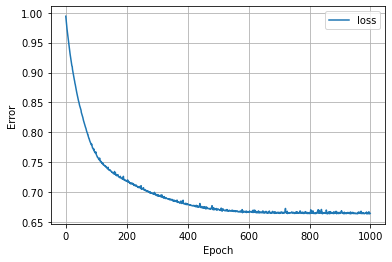

In [19]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss') 
  #plt.plot(history.history['mean_absolute_error'], label='mean_absolute_error')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

plot_loss(history)


#### Epoch 

Un `epoch` se refiere a una iteración completa a través de todos los datos de entrenamiento durante el proceso de entrenamiento de un modelo. Es decir, un `epoch` es cuando un conjunto de datos COMPLETO  pasa UNA VEZ hacia adelante y hacia atrás a través de la red neuronal. El número de epochs se define como un parámetro de entrenamiento y determina cuántas veces el algoritmo de aprendizaje automático debe pasar por todo el conjunto de datos de entrenamiento. 

####  Batch_size

En Keras y en general en el aprendizaje automático, el término "batch size" o "tamaño del lote" se refiere al número de muestras de entrenamiento que se pasarán a través de la red antes de que se actualicen los parámetros del modelo (por ejemplo, los pesos). Es un hiperparámetro que define la cantidad de datos que se ven durante una iteración del proceso de entrenamiento.


In [20]:
model.evaluate(
    X_test, y_test, verbose=1)


12/12 [==============================] - 0s 551us/step - loss: 0.7461 - mean_absolute_error: 0.5759


[0.746062695980072, 0.5758694410324097]

## Arquitectura de redes y capas múltiples

In [21]:
model = Sequential()
model.add(Dense(units=100, input_dim = 5, activation = 'relu'))
model.add(Dense(units=16, activation = 'tanh'))
model.add(Dense(units=1, activation = 'linear'))

In [22]:
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mean_absolute_error'])


In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               600       
                                                                 
 dense_3 (Dense)             (None, 16)                1616      
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2,233
Trainable params: 2,233
Non-trainable params: 0
_________________________________________________________________


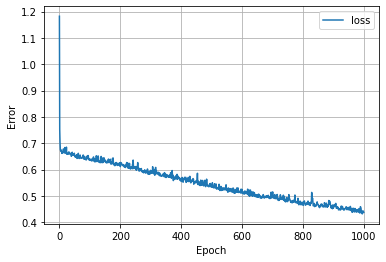

In [23]:

# Train model.
history =model.fit(X_train, y_train, batch_size = 64, epochs = 1000, verbose = 0)

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
plot_loss(history)

In [24]:
model.evaluate(
    X_test, y_test, verbose=1)


12/12 [==============================] - 0s 583us/step - loss: 1.0464 - mean_absolute_error: 0.6814


[1.0464485883712769, 0.6814056634902954]